In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/passenger.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [7]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [18]:
# convert date to proper datetime
# Check if 'Date' is the index, if so, reset it to make it a column again
if df.index.name == 'Date':
    df = df.reset_index()

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# sort by date
df = df.sort_values('Date')

# set index
df = df.set_index('Date')

In [13]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN


**INSIGHT 1-Big COVID drop, partial recovery but still below 2019**

In [14]:

#Create a total passenger column
service_cols = ['Local Route','Light Rail','Peak Service','Rapid Route','School']

df['Total'] = df[service_cols].sum(axis=1)


In [15]:
#resample by year
yearly = df['Total'].resample('Y').mean().to_frame('Avg_Daily_Total')
yearly['Year'] = yearly.index.year
print(yearly)


            Avg_Daily_Total  Year
Date                             
2019-12-31     44466.097826  2019
2020-12-31     26306.087432  2020
2021-12-31     25454.378082  2021
2022-12-31     29626.235616  2022
2023-12-31     37053.649315  2023
2024-12-31     37919.879121  2024


/tmp/ipython-input-4141365459.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df['Total'].resample('Y').mean().to_frame('Avg_Daily_Total')


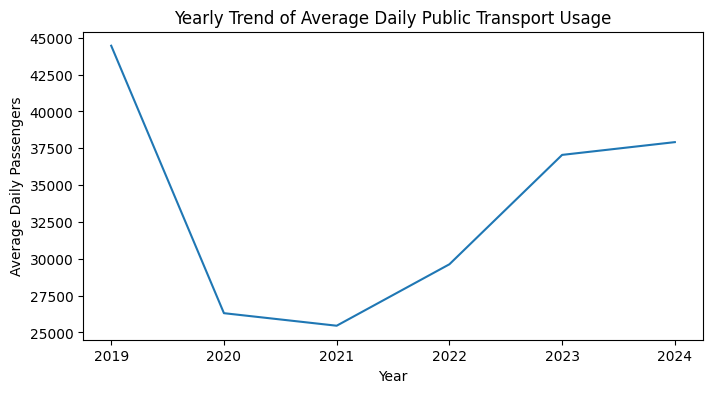

In [19]:
plt.figure(figsize=(8,4))
plt.plot(yearly['Year'], yearly['Avg_Daily_Total'])
plt.xlabel("Year")
plt.ylabel("Average Daily Passengers")
plt.title("Yearly Trend of Average Daily Public Transport Usage")
plt.show()

Compare with baseline(2019)

In [16]:
base_2019 = yearly.loc['2019-12-31','Avg_Daily_Total']

yearly['vs_2019_%'] = (yearly['Avg_Daily_Total'] - base_2019)/base_2019*100
print(yearly)


            Avg_Daily_Total  Year  vs_2019_%
Date                                        
2019-12-31     44466.097826  2019   0.000000
2020-12-31     26306.087432  2020 -40.840126
2021-12-31     25454.378082  2021 -42.755539
2022-12-31     29626.235616  2022 -33.373430
2023-12-31     37053.649315  2023 -16.669888
2024-12-31     37919.879121  2024 -14.721820


**INFERENCE:**

2020 and 2021 show a massive drop (~40–43%) in ridership compared to 2019 → this screams COVID impact.

From 2022 onwards, ridership is recovering, but:

2023 and 2024 are still about 15% below 2019 levels on average.

**INSIGHT 2 — Which service type contributes the most (Local vs Light Rail vs Rapid etc.)?**

Compute overall contributions of each service

In [20]:
overall_share = df[service_cols].sum() / df['Total'].sum()
overall_share


,0
Local Route,0.307030
Light Rail,0.223348
Peak Service,0.005574
Rapid Route,0.391019
School,0.073028


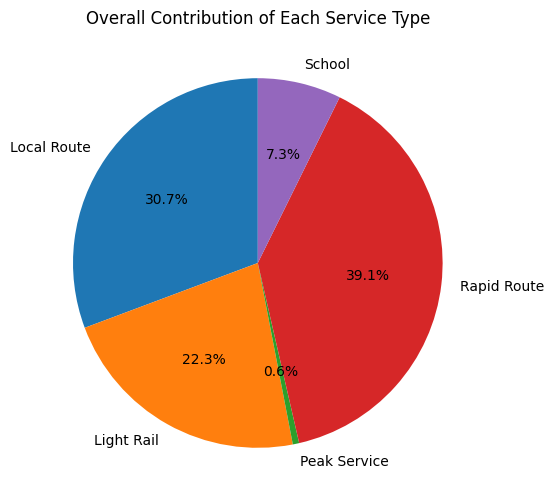

In [21]:
plt.figure(figsize=(6,6))
plt.pie(overall_share, labels=service_cols, autopct='%1.1f%%', startangle=90)
plt.title("Overall Contribution of Each Service Type")
plt.show()


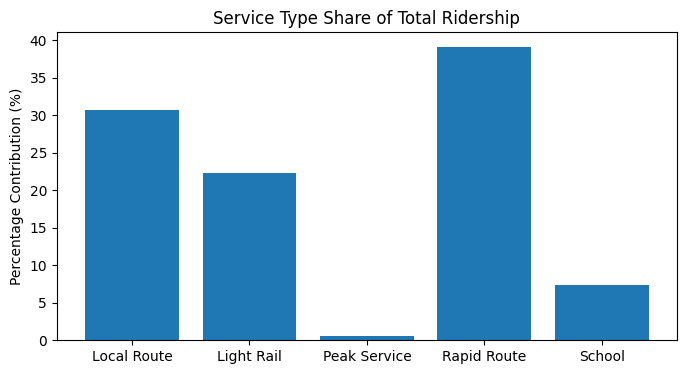

In [22]:
plt.figure(figsize=(8,4))
plt.bar(service_cols, overall_share*100)
plt.ylabel("Percentage Contribution (%)")
plt.title("Service Type Share of Total Ridership")
plt.show()


In [25]:
yearly_services = df[service_cols].resample('Y').mean()
yearly_services


/tmp/ipython-input-1438691555.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_services = df[service_cols].resample('Y').mean()


,Local Route,Light Rail,Peak Service,Rapid Route,School
Date,,,,,
2019-12-31,13140.543478,9685.032609,287.201087,18462.288043,2891.032609
2020-12-31,8181.218579,5484.049180,142.710383,10259.808743,2238.300546
2021-12-31,8247.235616,5414.391781,137.726027,9621.528767,2033.495890
2022-12-31,9144.509589,6766.695890,137.597260,11347.843836,2229.589041
2023-12-31,11033.745205,8746.389041,215.906849,14603.758904,2453.849315
2024-12-31,11663.758242,8692.780220,220.003663,14743.996337,2599.340659


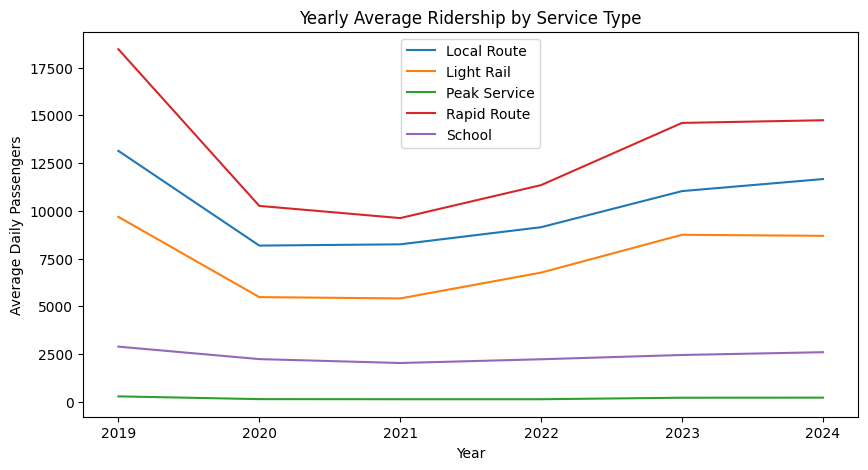

In [24]:
plt.figure(figsize=(10,5))
for col in service_cols:
    plt.plot(yearly_services.index.year, yearly_services[col], label=col)

plt.title("Yearly Average Ridership by Service Type")
plt.xlabel("Year")
plt.ylabel("Average Daily Passengers")
plt.legend()
plt.show()


INFERENCE

A pie chart clearly revealed that Rapid Route and Local Route dominate usage, contributing 39% and 31% respectively — together making up ~70% of total ridership.

Light Rail contributes ~22%, while School and Peak services together contribute less than 8%.

**Insight 3 — Weekday vs Weekend Demand Pattern**

Extract weekday information

In [26]:
df['weekday'] = df.index.day_name()


In [27]:
#compute average passengers per weekday

weekday_avg = (
    df.groupby('weekday')['Total']
      .mean()
      .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)
weekday_avg


,Total
weekday,
Monday,36095.098540
Tuesday,41520.536496
Wednesday,41780.521898
Thursday,41046.974453
Friday,39324.791971
Saturday,14913.018248
Sunday,10833.375912


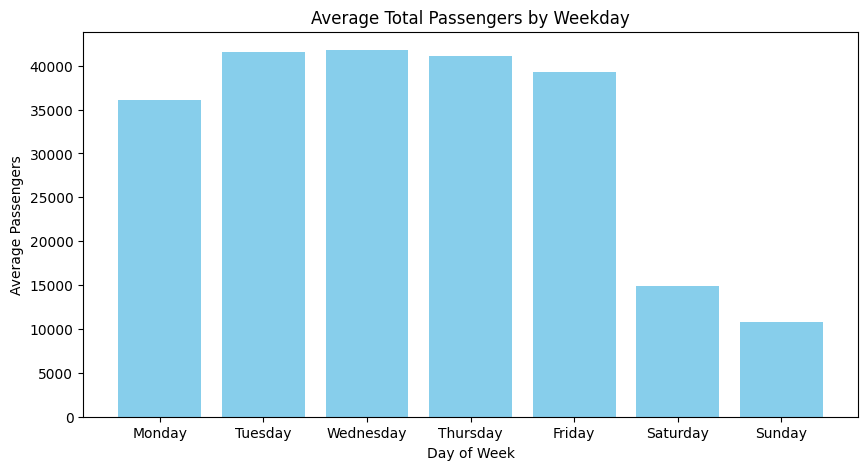

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(weekday_avg.index, weekday_avg.values, color='skyblue')
plt.title("Average Total Passengers by Weekday")
plt.ylabel("Average Passengers")
plt.xlabel("Day of Week")
plt.show()


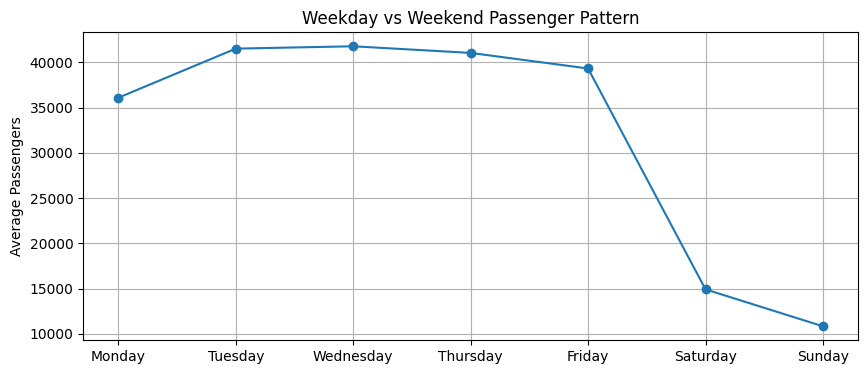

In [29]:
plt.figure(figsize=(10,4))
plt.plot(weekday_avg.index, weekday_avg.values, marker='o')
plt.title("Weekday vs Weekend Passenger Pattern")
plt.ylabel("Average Passengers")
plt.grid(True)
plt.show()


In [32]:
#quantifying the drop
weekday_mean = weekday_avg[:5].mean()
sat_ratio = weekday_avg['Saturday'] / weekday_mean
sun_ratio = weekday_avg['Sunday'] / weekday_mean

In [33]:
sat_ratio

np.float64(0.3732585791932905)

In [34]:
sun_ratio

np.float64(0.2711490345978292)

INFERENCE

From Monday to Friday, ridership is consistently high — around 36k–41k passengers per day.

But on weekends, usage drops sharply:
Saturday averages only ~37% of a typical weekday,
and Sunday drops even further to ~27%.

This indicates that the public transport system is predominantly used for work and school commuting, with significantly reduced leisure or weekend travel.


**INSIGHT 4- Weekday Pattern by Service**

In [35]:
#Compute weekday for each entry
df['weekday'] = df.index.day_name()


In [36]:
#Average Ridership Per Weekday Per Service
weekday_service = (
    df.groupby('weekday')[['Local Route','Light Rail','Peak Service','Rapid Route','School']]
      .mean()
      .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)
weekday_service


,Local Route,Light Rail,Peak Service,Rapid Route,School
weekday,,,,,
Monday,11444.678832,7541.551095,235.678832,13858.824818,3014.364964
Tuesday,13243.072993,8591.718978,281.729927,15949.737226,3454.277372
Wednesday,13378.525547,8620.357664,281.748175,15995.645985,3504.244526
Thursday,13166.708029,8515.218978,255.058394,15740.025547,3369.963504
Friday,12543.755474,8510.229927,202.854015,14942.156934,3125.795620
Saturday,3271.156934,5000.978102,0.000000,6640.737226,0.145985
Sunday,2191.868613,3588.069343,0.000000,5053.364964,0.072993


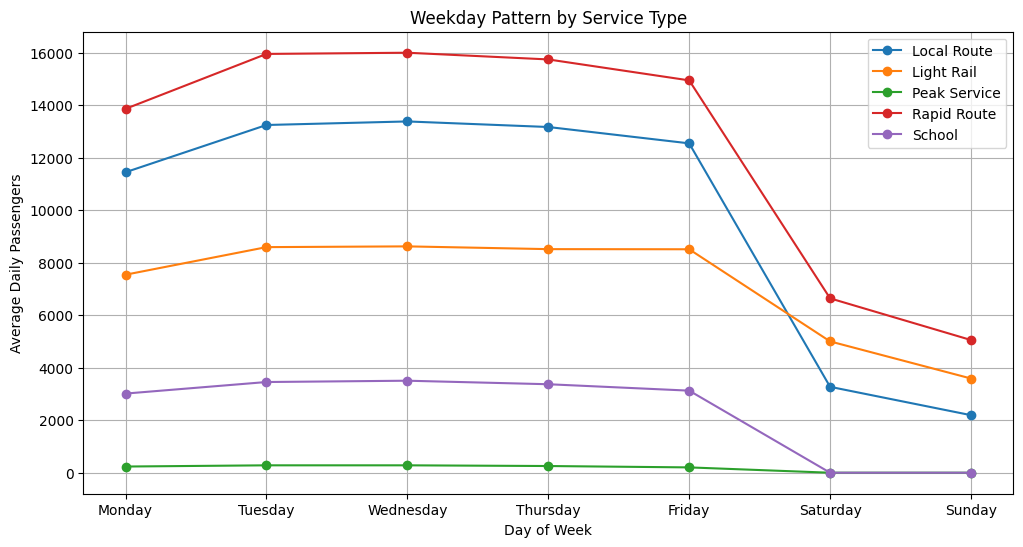

In [37]:
plt.figure(figsize=(12,6))

for col in ['Local Route','Light Rail','Peak Service','Rapid Route','School']:
    plt.plot(weekday_service.index, weekday_service[col], marker='o', label=col)

plt.title("Weekday Pattern by Service Type")
plt.xlabel("Day of Week")
plt.ylabel("Average Daily Passengers")
plt.legend()
plt.grid(True)
plt.show()


INFERENCE:

*School services operate almost entirely on weekdays, dropping to near zero on
weekends.

*Peak Service also shows a clear mid-week spike and completely disappears on weekends, matching office commute patterns.

*Rapid Route and Local Route remain consistently high on weekdays,
confirming they are the core commuting modes for the city.

*Light Rail shows strong weekday demand but drops significantly on weekends, indicating its role in work and school travel rather than leisure.

**Insight 5 — Recovery Trend by Service Type**

In [38]:
#Compare Each Year with 2019 (Pre-COVID Baseline)
service_cols = ['Local Route','Light Rail','Peak Service','Rapid Route','School']

yearly_services = df[service_cols].resample('Y').mean()
yearly_services.index = yearly_services.index.year
yearly_services


/tmp/ipython-input-904649140.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_services = df[service_cols].resample('Y').mean()


,Local Route,Light Rail,Peak Service,Rapid Route,School
Date,,,,,
2019,13140.543478,9685.032609,287.201087,18462.288043,2891.032609
2020,8181.218579,5484.049180,142.710383,10259.808743,2238.300546
2021,8247.235616,5414.391781,137.726027,9621.528767,2033.495890
2022,9144.509589,6766.695890,137.597260,11347.843836,2229.589041
2023,11033.745205,8746.389041,215.906849,14603.758904,2453.849315
2024,11663.758242,8692.780220,220.003663,14743.996337,2599.340659


In [39]:
#Compare Each Year with 2019 (Pre-COVID Baseline)
baseline = yearly_services.loc[2019]

recovery = ((yearly_services - baseline) / baseline) * 100
recovery


,Local Route,Light Rail,Peak Service,Rapid Route,School
Date,,,,,
2019,0.000000,0.000000,0.000000,0.000000,0.000000
2020,-37.740638,-43.376038,-50.309943,-44.428292,-22.577817
2021,-37.238246,-44.095265,-52.045437,-47.885502,-29.661952
2022,-30.409959,-30.132441,-52.090272,-38.535008,-22.879146
2023,-16.032809,-9.691692,-24.823805,-20.899518,-15.122046
2024,-11.238388,-10.245215,-23.397343,-20.139929,-10.089542


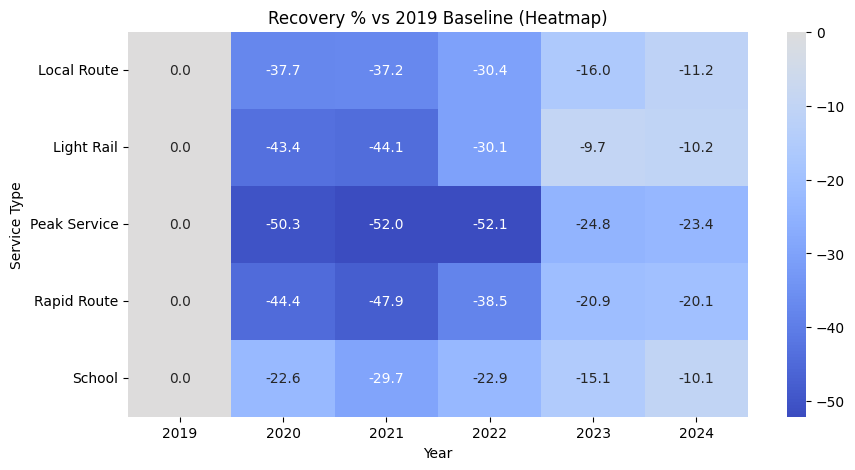

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate recovery %
baseline = yearly_services.loc[2019]
recovery = ((yearly_services - baseline) / baseline) * 100

plt.figure(figsize=(10,5))
sns.heatmap(recovery.T, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Recovery % vs 2019 Baseline (Heatmap)")
plt.xlabel("Year")
plt.ylabel("Service Type")
plt.show()
